In [51]:
#reload(lasagne)
import lasagne
import spatial_vae
reload(spatial_vae)
from spatial_vae import test_network
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

%matplotlib inline

In [52]:
n_fp = 16;

In [57]:
pred, actual, fp, imgs = test_network(weights_file='params_211088.390625.npz',get_fp=True)
pred_imgs = np.reshape(pred, (pred.shape[0],60,60))
actual_imgs = np.reshape(actual, (actual.shape[0],60,60))
imgs = np.uint8(np.transpose(imgs, (0,2,3,1)))
fps = np.reshape((fp+1)*240/2, (imgs.shape[0], n_fp, 2))

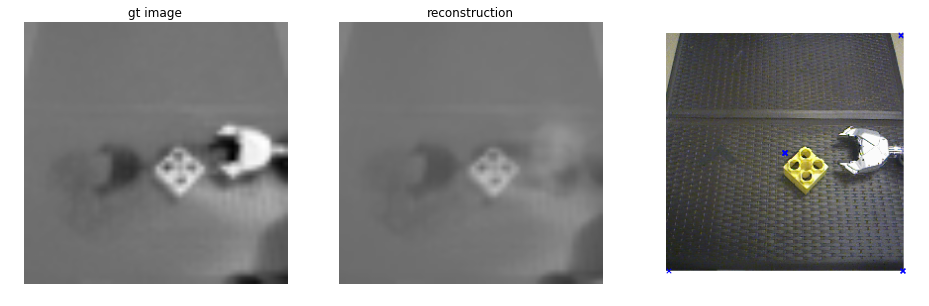

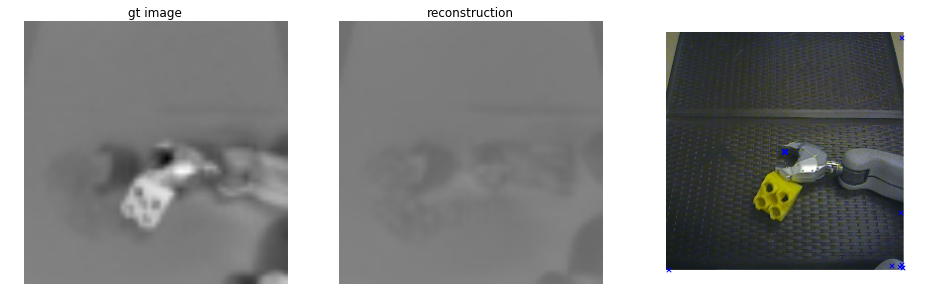

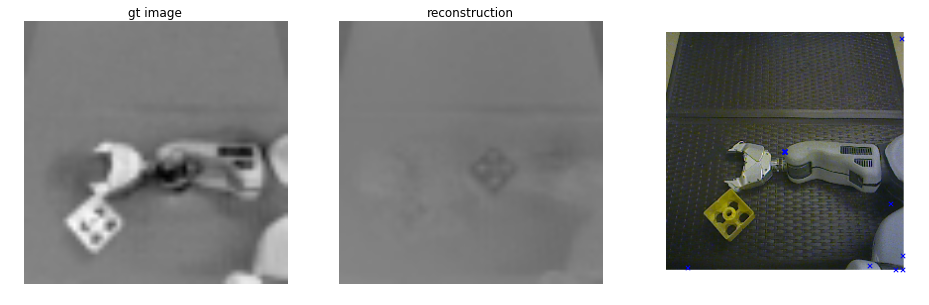

In [58]:
idx = [0,115,240]
plt.clf()
print('Example reconstructions')

for i in idx:
    vmin = min(pred_imgs[i].min(), actual_imgs[i].min())
    vmax = max(pred_imgs[i].max(), actual_imgs[i].max())
    
    plt.figure(figsize=(16,5));
    plt.subplot(1,3,1)
    plt.imshow(actual_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('gt image'); plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(pred_imgs[i], cmap = cm.Greys_r, vmin=vmin, vmax=vmax)
    plt.title('reconstruction'); plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(imgs[i]);
    plt.hold(True); plt.axis('off')
    plt.scatter(fps[i,:,0], fps[i,:,1], marker='x')

In [43]:
 fps[0]

array([[ 222.10862732,  120.08177185],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 239.1427002 ,    0.85971594],
       [ 232.65475464,    7.45488882],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 239.1872406 ,    0.85176229],
       [   0.46013832,  239.63830566],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 120.        ,  120.00006866],
       [ 239.98709106,    4.44158792],
       [ 239.44827271,  230.85646057],
       [ 120.        ,  120.00006866]], dtype=float32)